https://github.com/roboflow/notebooks/blob/main/notebooks/how-to-use-rf100.ipynb

In [1]:
import json

In [2]:
from roboflow import Roboflow

rf = Roboflow(api_key="P2w2decpA8QerBqtfOZE")
wsp = rf.workspace("roboflow-100")
wsp

loading Roboflow workspace...


In [4]:
import json

# Load the annotations
with open(dataset.location + "/train/_annotations.coco.json") as f:
    annotations = json.load(f)

# Filter for aerial category
aerial_annotations = [ann for ann in annotations['annotations'] if ann['category_id'] == aerial_category_id]

# Save filtered annotations
with open(dataset.location + "/train/_annotations_aerial.coco.json", 'w') as f:
    json.dump(aerial_annotations, f)

NameError: name 'dataset' is not defined

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert class vectors to binary class matrices (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the model
new_model = models.Sequential()

# Add convolutional layers
new_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
new_model.add(layers.MaxPooling2D((2, 2)))
new_model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add dense layers
new_model.add(layers.Flatten())
new_model.add(layers.Dense(64, activation='relu'))
new_model.add(layers.Dense(10, activation='softmax'))

# Compile the model
new_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
new_history = new_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Print the model summary
new_model.summary()

Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.5337 - accuracy: 0.4417 - val_loss: 1.3104 - val_accuracy: 0.5246
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1754 - accuracy: 0.5836 - val_loss: 1.1172 - val_accuracy: 0.6060
Epoch 3/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0109 - accuracy: 0.6453 - val_loss: 1.0079 - val_accuracy: 0.6471
Epoch 4/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.9126 - accuracy: 0.6799 - val_loss: 0.9304 - val_accuracy: 0.6791
Epoch 5/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.8410 - accuracy: 0.7065 - val_loss: 0.9065 - val_accuracy: 0.6879
Epoch 6/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7783 - accuracy: 0.7268 - val_loss: 0.8959 - val_accuracy: 0.6929
Epoch 7/10
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7294 - accuracy: 0.7452 - val_loss: 0.8608 -

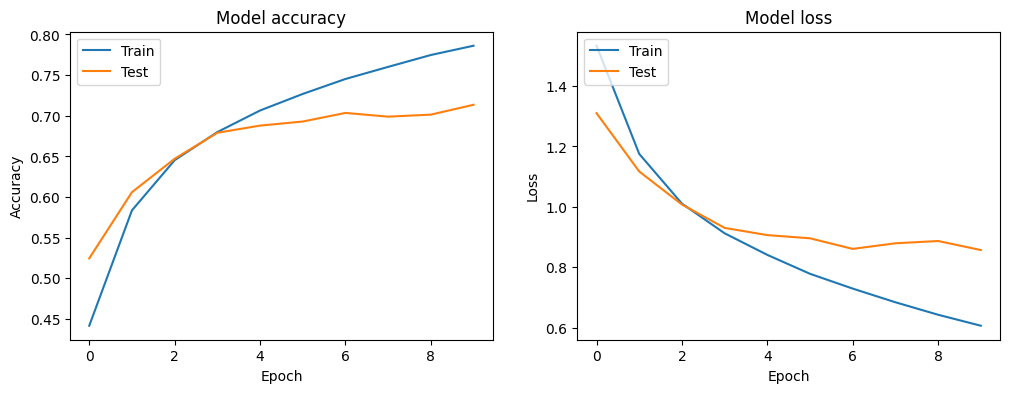

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(new_history.history['accuracy'])
plt.plot(new_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(new_history.history['loss'])
plt.plot(new_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [10]:
new_model.save('models/original/new_model.keras')

In [11]:
import tensorflow as tf

# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()

# Save the model to a file
with open('models/lite/new_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/z7/8n2dlxg16tggjrtnz6s70x180000gn/T/tmpapwi5u6w/assets


INFO:tensorflow:Assets written to: /var/folders/z7/8n2dlxg16tggjrtnz6s70x180000gn/T/tmpapwi5u6w/assets
2024-10-31 20:26:51.099468: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:378] Ignored output_format.
2024-10-31 20:26:51.099485: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:381] Ignored drop_control_dependency.
2024-10-31 20:26:51.099675: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /var/folders/z7/8n2dlxg16tggjrtnz6s70x180000gn/T/tmpapwi5u6w
2024-10-31 20:26:51.102009: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2024-10-31 20:26:51.102027: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /var/folders/z7/8n2dlxg16tggjrtnz6s70x180000gn/T/tmpapwi5u6w
2024-10-31 20:26:51.107933: I tensorflow/cc/saved_model/loader.cc:233] Restoring SavedModel bundle.
2024-10-31 20:26:51.186456: I tensorflow/cc/saved_model/loader.cc:217] Running initialization

Transfer learning with THhub
https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub

TF for image classification # https://www.tensorflow.org/federated/tutorials/federated_learning_for_image_classification

Datasets: https://universe.roboflow.com/yolo-experiment-sara-rahimi/aerial-images-vugjs/dataset/3

In [1]:
import numpy as np
import time

import PIL.Image as Image
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

import datetime

# %load_ext tensorboard

2024-12-01 21:09:39.207507: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
mobilenet_v2 ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
inception_v3 = "https://tfhub.dev/google/imagenet/inception_v3/classification/5"

classifier_model = mobilenet_v2

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_model, input_shape=IMAGE_SHAPE+(3,))
])

In [1]:
grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper

NameError: name 'tf' is not defined